1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

### Machine learning (ML) is good for:
- Complex problems/tasks: ML is designed to detect “hidden” patterns and “get” complicated relationships among large quantities of data - tasks that ML’s human counterparts might spin their wheels trying to suss out
- Clean, well-labelled datasets: as long as your data is clearly labelled, the sky’s basically the limit regarding the size of the dataset ML can tackle (larger quantities will simply take more processing power/time)
- Scalability: ideally, you want to have sufficient time/resources to train the ML model, beta test it among a small subset of users, then eventually introduce/test it to increasingly larger subsets (making adjustments based on results as you go), before the final rollout and integration into your systems

### Some instances when not to use ML:
- Insufficient data: too small/shallow of a dataset fed into ML will lead to inaccurate results - too inaccurate to be of use
- Dirty data: datasets that have not been pre-processed and are filled with null values, missing entries, and other inconsistencies will also yield inaccurate, unhelpful results
- Simple problems: if there’s a straightforward way to address a given problem, involving ML to solve it will needlessly complicate your process
- Poor performance: if your test runs yield low precision, low recall, and/or large error, this may not be a good model for ML
- Time crunch: if you need a quick turnaround for your solution that doesn’t allow for sufficient training/beta testing (ex. patching/securing a system following a cybersecurity attack), ML might not be the appropriate choice, at least not for the initial bandage/fix

2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [1]:
import pandas as pd

file_to_load = "loans_full_schema.csv"
lending = pd.read_csv(file_to_load)

lending_df = pd.DataFrame(lending)
lending_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [2]:
#replace Not a Number values with zero
lending_df_noNaN = lending_df.fillna(0)
lending_df_noNaN

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,0,0.00,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,0,0.00,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,0,0.00,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,0,0.00,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0.0,0,0.00,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,0.0,0,0.00,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0.0,0,0.00,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [3]:
# remove any rogue spaces
lending_df_noNaN.columns = lending_df_noNaN.columns.str.replace(' ', '')
lending_df_noNaN

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,0,0.00,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,0,0.00,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,0,0.00,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,0,0.00,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0.0,0,0.00,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,0.0,0,0.00,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0.0,0,0.00,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [4]:
#standardize date column
lending_df_noNaN['issue_month'] = pd.to_datetime(lending_df_noNaN['issue_month'])
lending_df_noNaN

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,0,0.00,...,C3,2018-03-01,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,0,0.00,...,C1,2018-02-01,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,0,0.00,...,D1,2018-02-01,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,0,0.00,...,A3,2018-01-01,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,2018-03-01,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0.0,0,0.00,...,A4,2018-01-01,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,0.0,0,0.00,...,D3,2018-02-01,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,2018-02-01,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0.0,0,0.00,...,A1,2018-02-01,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [5]:
corrMatrix = lending_df_noNaN.corr()
print(corrMatrix)

                                  emp_length  annual_income  debt_to_income  \
emp_length                          1.000000       0.149330       -0.004120   
annual_income                       0.149330       1.000000       -0.175986   
debt_to_income                     -0.004120      -0.175986        1.000000   
annual_income_joint                 0.022379       0.002667        0.244793   
debt_to_income_joint               -0.010051      -0.124262        0.389217   
delinq_2y                           0.012520       0.052236       -0.027411   
months_since_last_delinq            0.035044       0.033180       -0.013681   
earliest_credit_line               -0.129035      -0.156001       -0.090660   
inquiries_last_12m                  0.017820       0.090119        0.025039   
total_credit_lines                  0.135199       0.210163        0.199884   
open_credit_lines                   0.083867       0.176788        0.217677   
total_credit_limit                  0.168798       0

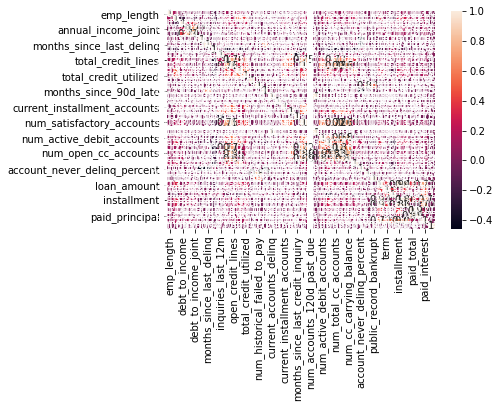

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot = True)
plt.show()

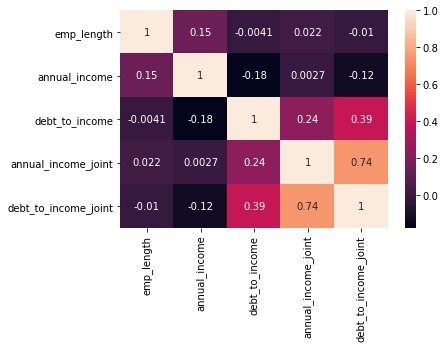

In [7]:
df_small = lending_df_noNaN.iloc[:,:10]
correlation_mat = df_small.corr()
sn.heatmap(correlation_mat, annot = True)
plt.show()

There is a small positive correlation between employment length and annual income, which makes sense - the longer you are employed in a job, the more likely you are to have an annual income to report.  Employment length has a very small negative correlation with debt to income; you have a slightly higher chance of paying down your debt the longer you hold down a steady job.  Likewise, there is a small negative correlation between annual income and debt to income: the higher your annual income, the more debt you are likely to pay down.  Interestingly, there is a fairly strong positive correlation between annual joint income and joint debt-to-income.  Perhaps couples that earn more also tend to spend/owe more in terms of being more likely to have a mortgage on a house (versus renting a home).  There is a high percentage of NaNs in these two columns in the original dataset, so one may also argue that we do not have enough concrete data to property compare these fields, and that we should take this particular correlation coefficient with a grain of salt.

4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

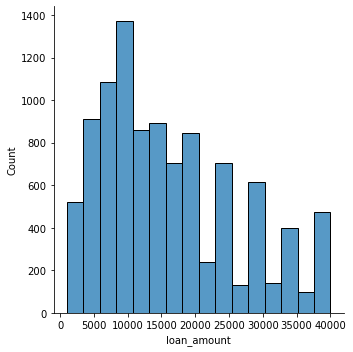

In [8]:
sn.displot(lending_df_noNaN, x="loan_amount", bins=16)
plt.show()

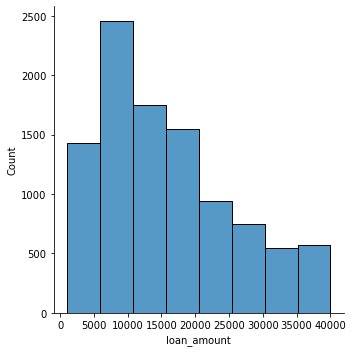

In [9]:
sn.displot(lending_df_noNaN, x="loan_amount", bins=8)
plt.show()

The data in these graphs skew right, aka, there is a higher volume of loans made in the lower $0-$10,000 amounts, then the number of loans decreases as you move through increasing dollar amounts going right.  With the first histogram, I chose 16 bins as 2500-dollar chunks seemed like a nice not too big, not too small increment.  I then ran a histogram with 8 bins ($5000 increments) for a more generalized look at the data's right skew.

5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function.

5a. Is there a better way to do this than with a lambda?

In [10]:
%%time

lending_df_noNaN['Region'] = lending_df_noNaN['state'].apply(lambda x: "Plains" if x in ["KS", "NE", "ND", "SD", "MT", "OK", "WY", "IA", "ID", "CO"]
                                                             else "Pacific" if x in ["WA", "CA", "OR", "NV", "HI", "AK", "NM"]
                                                             else "Midwest" if x in ["MO", "IL", "OH", "IN", "MI", "MN", "WI", "UT"]
                                                            else "Northeast" if x in ["PA", "ME", "CT", "MA", "NH", "NJ", "NY", "RI", "VT", "MD", "DE"]
                                                            else "South")

lending_df_noNaN.head()

CPU times: user 11.2 ms, sys: 1.4 ms, total: 12.6 ms
Wall time: 12.6 ms


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,0,0.00,...,2018-03-01,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,0,0.00,...,2018-02-01,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,0,0.00,...,2018-02-01,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,0,0.00,...,2018-01-01,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,2018-03-01,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific


There may be a more efficient way, but lambda does a pretty good job!

5b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

In [11]:
%%time

#define regions in dictionary
region_dict = {"Plains": ["KS", "NE", "ND", "SD", "MT", "OK", "WY", "IA", "ID", "CO"],
              "Pacific": ["WA", "CA", "OR", "NV", "HI", "AK", "NM"],
              "Midwest": ["MO", "IL", "OH", "IN", "MI", "MN", "WI", "UT"],
              "Northeast": ["PA", "ME", "CT", "MA", "NH", "NJ", "NY", "RI", "VT", "MD", "DE"],
              "South": ["TX", "AL", "AR", "FL", "GA", "KY", "MS", "LA", "NC", "SC", "TN", "VA", "WV", "AZ"]}

#function that maps states to region
def region(n):
    if n in region_dict["Plains"]:
        return 'Plains'
    if n in region_dict["Pacific"]:
        return 'Pacific'
    if n in region_dict["Midwest"]:
        return 'Midwest'
    if n in region_dict["Northeast"]:
        return 'Northeast'
    else:
        return 'South'

lending_df_noNaN["region2"] = lending_df_noNaN["state"].apply(lambda x: region(x))
lending_df_noNaN.head()

CPU times: user 14.7 ms, sys: 468 µs, total: 15.1 ms
Wall time: 15.7 ms


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region,region2
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,0,0.00,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,0,0.00,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,0,0.00,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,0,0.00,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific,Pacific


Both methods work pretty well, but the lambda function (12.6 ms) is a bit faster than the dictionary approach (15.1 ms).  The lambda code is also much more succinct. 

6. Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

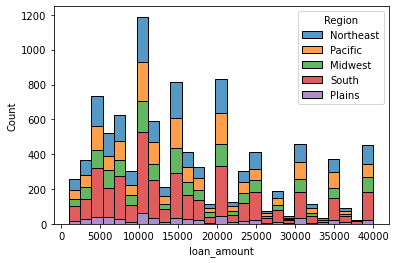

In [12]:
sn.histplot(lending_df_noNaN,
    x="loan_amount", hue="Region",
    multiple="stack")

plt.show()

Overall, the regions follow the general trend of having more loans in the lower dollar amounts - aka, the data still skews right.  Of the regions, the South seems to have the most high-dollar-amount loans, followed by the Northeast.